In [ ]:
# import the file
from google.colab import files 
uploaded = files.upload

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Country-data.csv") # read in the df
df=df.set_index('country')
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Some preprocessing
for col in df.columns:
  df = df.astype(float) # make sure all your data is in float format
  df = (df-df.min())/(df.max()-df.min()) # perform min-max scaling of your features


In [ ]:
df.shape

(167, 9)

In [ ]:
# standardlize 
df = (df-df.mean())/df.std()

In [ ]:
# Perform PCA
num_component=8 # since the data is 167by9

pca = PCA(num_component)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# variance
print(pca.explained_variance_ratio_)
pca.explained_variance_ratio_[0]

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282]


0.45951739786095913

In [ ]:
# Learning how variance depends on number of components
additive_variance=[]
var=0
for i in range(num_component):
    var=var+pca.explained_variance_ratio_[i]
    additive_variance.append(var)

additive_variance=np.array(additive_variance)
additive_variance=additive_variance*100 # convert ratio to percentage

Text(0.5, 0, 'Number of components')

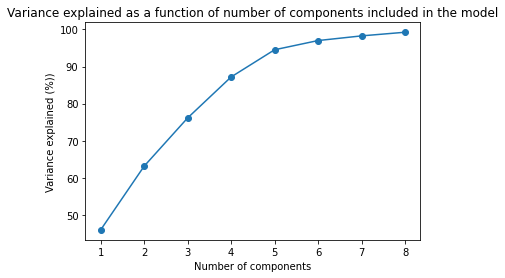

In [ ]:
# Plot the graph 
plt.plot(range(1,num_component+1,1),additive_variance,marker="o")
plt.title("Variance explained as a function of number of components included in the model")
plt.ylabel("Variance explained (%))")
plt.xlabel("Number of components")

Text(0.5, 0, 'Component Number')

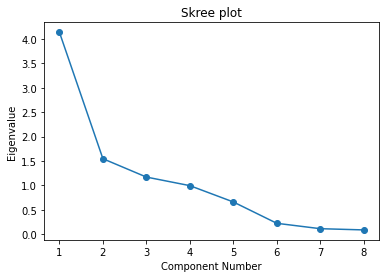

In [ ]:
# how eigenvalue depends on number of components
plt.plot(range(1,num_component+1,1),pca.explained_variance_,marker="o")
plt.title("Skree plot")
plt.ylabel("Eigenvalue")
plt.xlabel("Component Number")

In [ ]:
# To find the number of compnents of PCA transformation
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)

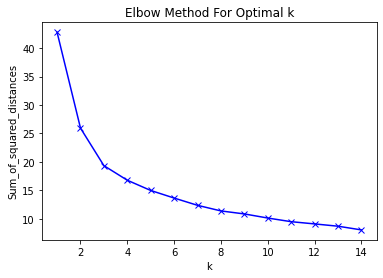

In [ ]:
# Elbow method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()